# **Import the Libraries and Data** #

In [52]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cross_validation import KFold
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, RidgeClassifierCV
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, mean_squared_error, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split, GridSearchCV, KFold, learning_curve, RandomizedSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble, linear_model, neighbors, svm, tree

from scipy.stats import randint
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('C:/Users/ecbox/Py-proj/Titanic/Datasets'))

df_train = pd.read_csv('C:/Users/ecbox/Py-proj/Titanic/Datasets/train.csv', sep=',')
df_test = pd.read_csv('C:/Users/ecbox/Py-proj/Titanic/Datasets/test.csv', sep=',')
df_data = df_train.append(df_test)

PassengerId = df_test['PassengerId']
Submission = pd.DataFrame()
Submission['PassengerId'] = df_test['PassengerId']

['gender_submission.csv', 'test.csv', 'train.csv']


**Explore the data statistically**

In [53]:
print(df_train.shape)
print('-----------------')
print(df_test.shape)

(891, 12)
-----------------
(418, 11)


In [54]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [56]:
print(pd.isnull(df_data).sum())

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


In [57]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Explore data graphically**

KeyboardInterrupt: 

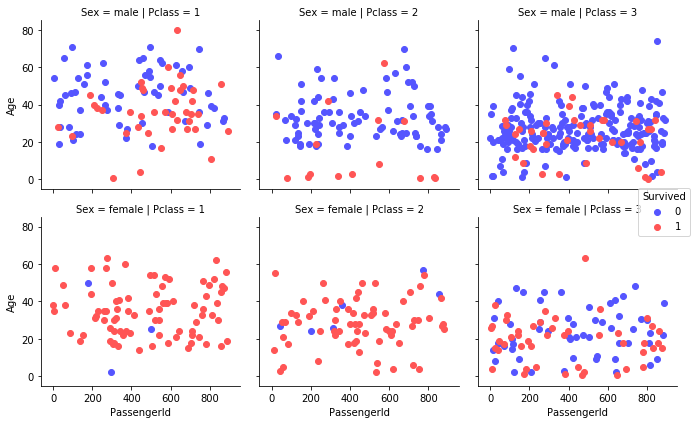

In [61]:
grid = sns.FacetGrid(df_train, col='Pclass', row='Sex', hue='Survived', palette='seismic')
grid = grid.map(plt.scatter, 'PassengerId', 'Age')
grid.add_legend()
grid

In [ ]:
grid = sns.FacetGrid(df_train, col='Embarked', row='Sex', hue='Survived', palette='seismic')
grid = grid.map(plt.scatter, 'PassengerId', 'Age')
grid.add_legend()
grid

Women who embarked at port Q with PassengerId below ~500 survived. Odd.

In [ ]:
grid = sns.FacetGrid(df_train, col='SibSp', row='Sex', hue='Survived', palette='seismic')
grid = grid.map(plt.scatter, 'PassengerId', 'Age')
grid.add_legend()
grid

In [ ]:
grid = sns.FacetGrid(df_train, col='Parch', row='Sex', hue='Survived', palette='seismic')
grid=grid.map(plt.scatter, 'PassengerId', 'Age')
grid.add_legend()
grid

In [ ]:
g = sns.pairplot(df_train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette='seismic', size=4, diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=50))
g.set(xticklabels=[])

**Create simple model**

In [ ]:
Numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

test = df_test[Numeric_columns].fillna(-1000)
data_to_train = df_train[Numeric_columns].fillna(-1000)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(data_to_train, y, test_size=0.3, random_state=21, stratify=y)

clf = SVC()
clf.fit(X_train, y_train)

print('Accuracy: {}'.format(clf.score(X_test, y_test)))

In [ ]:
Submission['Survived'] = clf.predict(test)
print(Submission.head())
print('Predictions generated')

In [ ]:
# Submission.set_index('PassengerId', inplace=True)
# Submission.to_csv('SimpleSVCsubmission.csv', sep=',')
print('File created')

# **Clean data & engineer features**

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))
sns.boxplot(data=df_data, x='Pclass', y='Fare', ax=ax1)
plt.figure(1)
sns.boxplot(data=df_data, x='Embarked', y='Fare', ax=ax2)
plt.show()

In [ ]:
embarked = ['S', 'C', 'Q']
for port in embarked:
    fare_to_impute = df_data.groupby('Embarked')['Fare'].median()[embarked.index(port)]
    df_data.loc[(df_data['Fare'].isnull()) & (df_data['Embarked'] == port), 'Fare'] = fare_to_impute
    
df_train['Fare'] = df_data['Fare'][:891]
df_test['Fare'] = df_data['Fare'][891:]
print('Missing Fares Estimated')

In [ ]:
for x in range(len(df_train['Fare'])):
    if pd.isnull(df_train['Fare'][x]):
        pclass = df_train['Pclass'][x]
        df_train['Fare'][x] = round(df_train[df_train['Pclass'] == pclass]['Fare'].mean(), 8)

for x in range(len(df_test['Fare'])):
    if pd.isnull(df_test['Fare'][x]):
        pclass = df_test['Pclass'][x]
        df_test['Fare'][x] = round(df_test[df_test['Pclass'] == pclass]['Fare'].mean(), 8)

df_data['FareBand'] = pd.qcut(df_data['Fare'], 8, labels=[1, 2, 3, 4, 5, 6, 7, 8]).astype('int')
df_train['FareBand'] = pd.qcut(df_train['Fare'], 8, labels=[1, 2, 3, 4, 5, 6, 7, 8]).astype('int')
df_test['FareBand'] = pd.qcut(df_test['Fare'], 8, labels=[1, 2, 3, 4, 5, 6, 7, 8]).astype('int')
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()
print('FareBand feature created')

In [ ]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df_data['Embarked'] = df_data['Embarked'].map(embarked_mapping)
df_train['Embarked'] = df_data['Embarked'][:891]
df_test['Embarked'] = df_data['Embarked'][891:]
print('Embarked feature created')
df_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

In [ ]:
fareband = [1, 2, 3, 4]
for fare in fareband:
    embark_to_impute = df_data.groupby('FareBand')['Embarked'].median()[fare]
    df_data.loc[(df_data['Embarked'].isnull()) & (df_data['FareBand'] == fare), 'Embarked'] = embark_to_impute
    
df_train['Embarked'] = df_data['Embarked'][:891]
df_test['Embarked'] = df_data['Embarked'][891:]
print('Missing Embarkation Estimated')

In [ ]:
dummies = pd.get_dummies(df_train[['Sex']], prefix_sep='_')
df_train = pd.concat([df_train, dummies], axis=1)
testdummies = pd.get_dummies(df_test[['Sex']], prefix_sep='_')
df_test = pd.concat([df_test, testdummies], axis=1)
print('Gender feature added')

In [ ]:
gender_mapping = {'female': 0, 'male': 1}
df_data['Sex'] = df_data['Sex'].map(gender_mapping)
df_data['Sex'] = df_data['Sex'].astype(int)

df_train['Sex'] = df_data['Sex'][:891]
df_test['Sex'] = df_data['Sex'][891:]
print('Gender category created')

In [ ]:
df_data['NameLen'] = df_data['Name'].apply(lambda x: len(x))
print('Name length calculated')

df_train['NameLen'] = df_data['NameLen'][:891]
df_test['NameLen'] = df_data['NameLen'][891:]

df_train['NameBand'] = pd.cut(df_train['NameLen'], bins=5, labels=[1, 2, 3, 4, 5])
df_test['NameBand'] = pd.cut(df_test['NameLen'], bins=5, labels=[1, 2, 3, 4, 5])

dummies = pd.get_dummies(df_train[['NameBand']].astype('category'), prefix_sep='_')
df_train = pd.concat([df_train, dummies], axis=1)
dummies = pd.get_dummies(df_test[['NameBand']].astype('category'), prefix_sep='_')
df_test = pd.concat([df_test, dummies], axis=1)
print('Name length categories created')

pd.qcut(df_train['NameLen'], 5).value_counts()

In [64]:
df_data['Title'] = df_data.Name.str.extract(r' ([A-Za-z]+)\.', expand=False)

df_data['Title'] = df_data['Title'].replace('Mlle', 'Miss')
df_data['Title'] = df_data['Title'].replace('Master', 'Master')
df_data['Title'] = df_data['Title'].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
df_data['Title'] = df_data['Title'].replace(['Jonkheer', 'Don'], 'Mr')
df_data['Title'] = df_data['Title'].replace(['Capt', 'Major', 'Col', 'Rev', 'Dr'], 'Military')
df_data['Title'] = df_data['Title'].replace(['Lady', 'Countess', 'Sir'], 'Honor')

df_train['Title'] = df_data['Title'][:891]
df_test['Title'] = df_data['Title'][891:]

titledummies = pd.get_dummies(df_train[['Title']], prefix_sep='_')
df_train = pd.concat([df_train, titledummies], axis=1)
ttitledummies = pd.get_dummies(df_test[['Title']], prefix_sep='_')
df_test = pd.concat([df_test, ttitledummies], axis=1)
print('Title categories added')

Title categories added


In [65]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Military': 5, 'Honor': 6}
df_data['TitleCat'] = df_data['Title'].map(title_mapping)
df_data['TitleCat'] = df_data['TitleCat'].astype(int)
df_train['TitleCat'] = df_data['TitleCat'][:891]
df_test['TitleCat'] = df_data['TitleCat'][891:]
print('Title category created')

Title category created


In [66]:
titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Military', 'Honor']
for title in titles:
    age_to_impute = df_data.groupby('Title')['Age'].median()[title]
    df_data.loc[(df_data['Age'].isnull()) & (df_data['Title'] == title), 'Age'] = age_to_impute

df_train['Age'] = df_data['Age'][:891]
df_test['Age'] = df_data['Age'][891:]
print('Missing ages estimates')

Missing ages estimates


In [67]:
bins = [0, 12, 24, 45, 60, np.inf]
labels = ['Child', 'Young Adult', 'Adult', 'Older Adult', 'Senior']
df_train['AgeBand'] = pd.cut(df_train['Age'], bins, labels=labels)
df_test['AgeBand'] = pd.cut(df_test['Age'], bins, labels=labels)
print('Age feature created')

dummies = pd.get_dummies(df_train[['AgeBand']], prefix_sep='_')
df_train = pd.concat([df_train, dummies], axis=1)
dummies = pd.get_dummies(df_test[['AgeBand']], prefix_sep='_')
df_test = pd.concat([df_test, dummies], axis=1)
print('AgeBand feature created')

Age feature created
AgeBand feature created


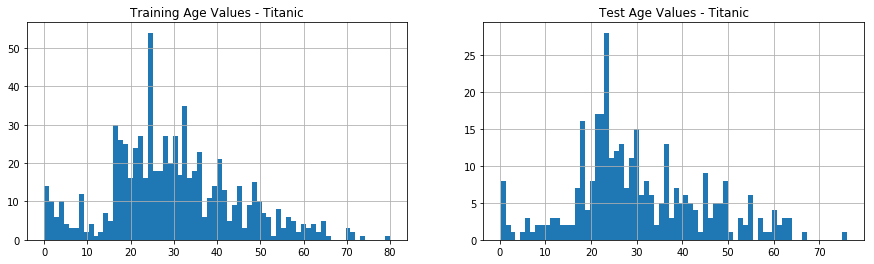

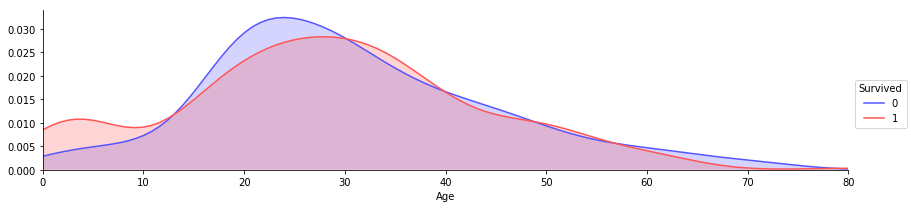

In [62]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Training Age Values - Titanic')
axis2.set_title('Test Age Values - Titanic')

df_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
df_test['Age'].hist(bins=70, ax=axis2)

facet = sns.FacetGrid(df_train, hue='Survived', palette='seismic', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

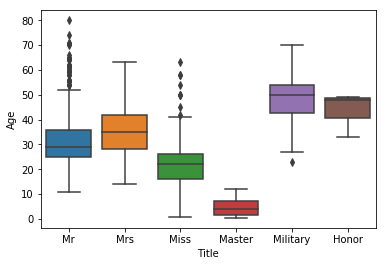

In [68]:
sns.boxplot(data=df_train, x='Title', y='Age')

In [69]:
df_train['Alone'] = np.where(df_train['SibSp'] + df_train['Parch'] + 1 == 1, 1, 0)
df_test['Alone'] = np.where(df_test['SibSp'] + df_test['Parch'] + 1 == 1, 1, 0)
print('Lone traveler feature added')

Lone traveler feature added
